In [71]:
import numpy as np
from sklearn.cluster import DBSCAN, KMeans
from PIL import Image
import os
import matplotlib.pyplot as plt
import cv2
from sklearn.preprocessing import StandardScaler

In [53]:
folder_path = "Data\OralCancer\cancer"
images = []
labels = []
for filename in os.listdir(folder_path):
    if filename.endswith('.jpg') or filename.endswith('.png'):
        image_path = os.path.join(folder_path, filename)
        image = cv2.imread(image_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
        images.append(image)
        labels.append(0)

In [6]:
folder_path = "Data\\OralCancer\\non-cancer"
for filename in os.listdir(folder_path):
    if filename.endswith('.jpg') or filename.endswith('.png'):
        image_path = os.path.join(folder_path, filename)
        image = cv2.imread(image_path)
        if image.mode != 'RGB':
                image = image.convert('RGB')
        image_resize = image.resize((512, 512))
        images.append(image_resize)
        labels.append(1)

In một số ảnh

In [ ]:
for i in range(3):
    plt.imshow(images[np.random.randint(1, 100)].convert('L'))
    plt.show()

Thử phân đoạn bằng 2 bức ảnh đầu tiên bằng DBSCAN

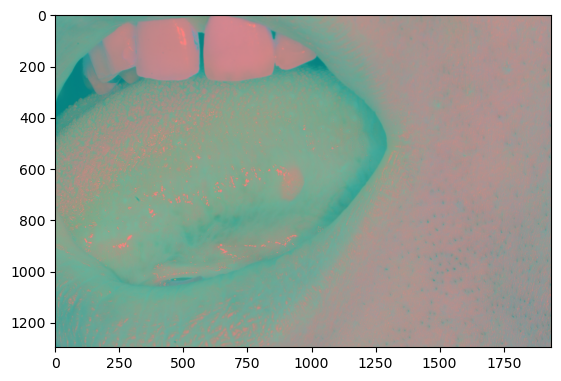

In [55]:
plt.imshow(images[0])
plt.show()

In [59]:
dbscan = DBSCAN(eps=0.01, min_samples=7)
data = image.reshape((-1, 3))
data = StandardScaler().fit_transform(data)
dbscan.fit(data)

DBSCAN(eps=0.01, min_samples=7)

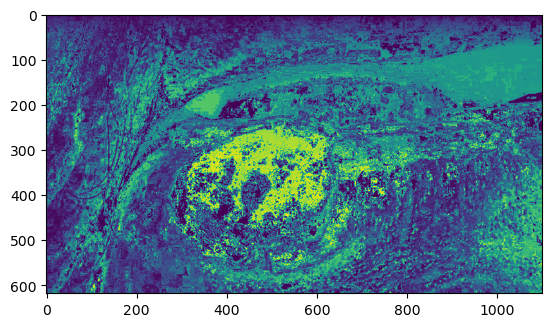

In [68]:
plt.imshow(dbscan.labels_.reshape(image.shape[:2]))
plt.show()

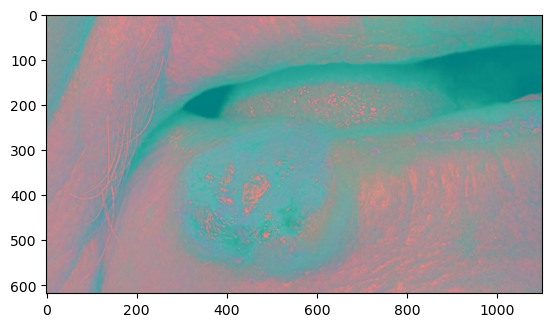

In [69]:
plt.imshow(image)
plt.show()

In [78]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(dbscan.labels_.reshape(-1, 1))
kmeans.labels_.shape

(679800,)

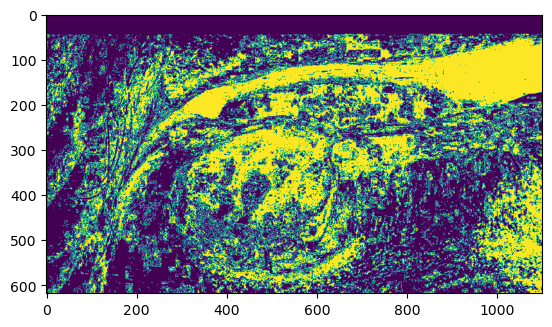

In [79]:
plt.imshow(kmeans.labels_.reshape(image.shape[:2]))
plt.show()